# Results

This notebook is intended to be used to display the working results of experiments. We store all working results files in google drive. We will connect to Google Drive through the the Google Drive API.

## Controlled Results

We begin by testing the training and testing accuracy of a control network and parallel control network. The control network is a standard Alexnet network trained to predict the top-1 accuracy of the CIFAR-10 dataset. We use an Adam Optimizer and a batch size of 128 and train the network for 50 epochs. The parallel control network is also a standard Alexnet network trained on the same dataset. The parallel control network differs from the control network in that it uses n parallel processes with each holding a copy of model. After each iteration, each worker aggregates the gradient updates using a typical non-weighted average. Each worker only trains on 128 / n items in each iteration. 

This test is intended to show the affect of using a typical data parallel training design on the training of a network. We hypothesize that the training of these two networks will be roughly the same. We will not look at the overall training times. Instead we look at the training accuracy after 25 iterations and testing accuracy after each epoch for both networks.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()
gauth.LocalWebserverAuth() # client_secrets.json need to be in the same directory as the script
drive = GoogleDrive(gauth)

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=572059058780-vfog8alkh5jntv309bb1qcm1piabahsd.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [29]:
# Download control 
fileList = drive.ListFile({'q': "'1aDIGjCt0IKpfKXK2Wqyn85hsrYu0pNVl' in parents and trashed=false"}).GetList()
for file in fileList:
    if(file['title'] == "testing_accuracy.npy"):
        file = drive.CreateFile({'id': file['id']})
        file.GetContentFile('temp.npy')
        control_testing_accuracy = np.load("temp.npy")
        os.remove("temp.npy")        
    elif(file['title'] == "training_accuracy.npy"):
        file = drive.CreateFile({'id': file['id']})
        file.GetContentFile('temp.npy')
        control_training_accuracy = np.load("temp.npy")
        os.remove("temp.npy")

In [30]:
# Download control 
fileList = drive.ListFile({'q': "'1iGfDZLTCFImeciXFVIyGO2a4HOc62K_u' in parents and trashed=false"}).GetList()
for file in fileList:
    if(file['title'] == "testing_accuracy.npy"):
        file = drive.CreateFile({'id': file['id']})
        file.GetContentFile('temp.npy')
        parallel_control_testing_accuracy = np.load("temp.npy")
        os.remove("temp.npy")        
    elif(file['title'] == "training_accuracy.npy"):
        file = drive.CreateFile({'id': file['id']})
        file.GetContentFile('temp.npy')
        parallel_control_training_accuracy = np.load("temp.npy")
        os.remove("temp.npy")

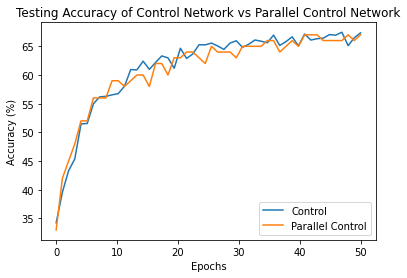

In [37]:
# Display Testing Results
x = np.linspace(0,len(control_testing_accuracy), len(control_testing_accuracy))
p1 = plt.plot(x, control_testing_accuracy)
p2 = plt.plot(x, parallel_control_testing_accuracy)
plt.legend((p1[0], p2[0]), ("Control", "Parallel Control"))
plt.title("Testing Accuracy of Control Network vs Parallel Control Network")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.show()